import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.2.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.fashion_mnist

In [6]:
type(mnist)

module

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
np.max(x_train)

255

In [10]:
np.mean(x_train)

72.94035223214286

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [13]:
#####Data Exploration

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_test.shape

(10000, 28, 28)

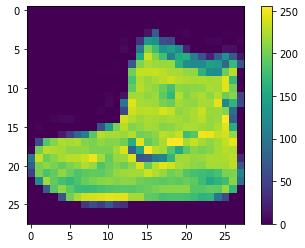

In [16]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
x_train = x_train/255.0

In [19]:
x_test = x_test/255.0

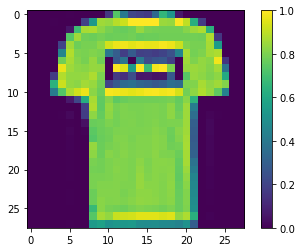

In [20]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [21]:
###Build the model with TF 2

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [23]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
####Model Compilation


In [26]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4998 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2570 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8849
0.8848999738693237


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
accuracy_score(y_test, y_pred)

0.8849

In [32]:
pred = model.predict(x_test)

In [33]:
pred

array([[5.81781467e-09, 5.14323013e-13, 9.15731269e-10, ...,
        2.26712506e-03, 1.71799943e-08, 9.96667922e-01],
       [1.59096344e-05, 1.63405765e-11, 9.96858001e-01, ...,
        1.93456264e-16, 1.35184988e-11, 2.22552486e-13],
       [4.01642231e-09, 1.00000000e+00, 2.99836002e-13, ...,
        2.64267812e-25, 1.14529653e-12, 2.60989216e-22],
       ...,
       [4.28471230e-06, 7.84988207e-15, 3.60749073e-06, ...,
        5.35765703e-12, 9.99974489e-01, 1.79856531e-12],
       [1.85583069e-08, 9.99998808e-01, 1.59236874e-10, ...,
        6.17375051e-17, 4.07675005e-09, 1.03394174e-13],
       [3.52151324e-06, 3.94512409e-11, 1.13217050e-06, ...,
        4.15656529e-03, 7.95489032e-05, 1.25888721e-06]], dtype=float32)

In [35]:
pred[0]

array([5.8178147e-09, 5.1432301e-13, 9.1573127e-10, 4.7026046e-12,
       1.9387361e-09, 1.0649145e-03, 2.5957512e-09, 2.2671251e-03,
       1.7179994e-08, 9.9666792e-01], dtype=float32)

In [36]:
np.argmax(pred[0])

9

In [37]:
np.argmax(pred[1])

2

In [38]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)